# Import Libraries

In [69]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load and Preprocess Data

In [70]:
# loading dataset
movie_set = pd.read_csv("/content/netflix-rotten-tomatoes-metacritic-imdb.csv (1).zip") # import the dataset

In [71]:
# shape for netflix dataset
movie_set.shape

(15480, 29)

In [72]:
movie_set.head(10)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,NaN,NaN
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307482,https://www.imdb.com/title/tt1973421,An enigmatic commissioner joins the Warsaw Pol...,107.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BZWYyYW...,NaN,NaN
8,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker strugglin

In [73]:
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [74]:
movie_set.dtypes

,0
Title,object
Genre,object
Tags,object
Languages,object
Series or Movie,object
Hidden Gem Score,float64
Country Availability,object
Runtime,object
Director,object
Writer,object


In [75]:
# describe
movie_set.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [76]:
# checking number of columns and their datatype
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

# Data Cleaning and Imputation

In [77]:
# remove duplicate data
movie_set.drop_duplicates(inplace = True)

In [78]:
# drop columns with 30% or more missing data
missing_data = (movie_set.isnull().sum() / len(movie_set)) * 100
columns_missing_data = missing_data[missing_data >= 30].index
movie_set.drop(columns = columns_missing_data, inplace = True)

In [79]:
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 13770 non-null  object 
 2   Tags                  15413 non-null  object 
 3   Languages             13526 non-null  object 
 4   Series or Movie       15480 non-null  object 
 5   Hidden Gem Score      13379 non-null  float64
 6   Country Availability  15461 non-null  object 
 7   Runtime               15479 non-null  object 
 8   Writer                11150 non-null  object 
 9   Actors                13555 non-null  object 
 10  IMDb Score            13381 non-null  float64
 11  Release Date          13373 non-null  object 
 12  Netflix Release Date  15480 non-null  object 
 13  Netflix Link          15480 non-null  object 
 14  IMDb Link             13177 non-null  object 
 15  Summary            

In [80]:
# grouped all columns with non-numeric values and are objects
object_streaming = movie_set.select_dtypes(exclude = ['int', 'float']).columns
object_streaming = movie_set[object_streaming]
object_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 15480 non-null  object
 1   Genre                 13770 non-null  object
 2   Tags                  15413 non-null  object
 3   Languages             13526 non-null  object
 4   Series or Movie       15480 non-null  object
 5   Country Availability  15461 non-null  object
 6   Runtime               15479 non-null  object
 7   Writer                11150 non-null  object
 8   Actors                13555 non-null  object
 9   Release Date          13373 non-null  object
 10  Netflix Release Date  15480 non-null  object
 11  Netflix Link          15480 non-null  object
 12  IMDb Link             13177 non-null  object
 13  Summary               15471 non-null  object
 14  Image                 15480 non-null  object
 15  Poster                11842 non-null

In [81]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imp = SimpleImputer(strategy='most_frequent')

# List of columns to impute
columns_to_impute = ['Tags', 'Genre', 'Languages', 'Runtime', 'Writer', 'Actors', 'Release Date']

# Impute the non-numeric values using most_frequent strategy
for column in columns_to_impute:
    if object_streaming[column].dtype == 'object':  # Check if the column is categorical
        object_streaming[column] = imp.fit_transform(object_streaming[[column]]).ravel()
    elif object_streaming[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        object_streaming[column] = imp.fit_transform(object_streaming[[column]]).ravel()


<ipython-input-81-0b0e3f9e2cbd>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-0b0e3f9e2cbd>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-0b0e3f9e2cbd>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-0b0e

In [82]:
object_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 15480 non-null  object
 1   Genre                 15480 non-null  object
 2   Tags                  15480 non-null  object
 3   Languages             15480 non-null  object
 4   Series or Movie       15480 non-null  object
 5   Country Availability  15461 non-null  object
 6   Runtime               15480 non-null  object
 7   Writer                15480 non-null  object
 8   Actors                15480 non-null  object
 9   Release Date          15480 non-null  object
 10  Netflix Release Date  15480 non-null  object
 11  Netflix Link          15480 non-null  object
 12  IMDb Link             13177 non-null  object
 13  Summary               15471 non-null  object
 14  Image                 15480 non-null  object
 15  Poster                11842 non-null

In [83]:
# Store all columns that have int or float as their datatypes
numeric_streaming = movie_set.select_dtypes(include = ['int', 'float']).columns
numeric_streaming = movie_set[numeric_streaming]

In [84]:
numeric_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hidden Gem Score  13379 non-null  float64
 1   IMDb Score        13381 non-null  float64
 2   IMDb Votes        13379 non-null  float64
dtypes: float64(3)
memory usage: 362.9 KB


In [85]:
# Impute these features using the mean method
imp = SimpleImputer(strategy = 'mean')
numeric_streaming['IMDb Score'] = imp.fit_transform(numeric_streaming[['IMDb Score']])
numeric_streaming['IMDb Votes'] = imp.fit_transform(numeric_streaming[['IMDb Votes']])
numeric_streaming['Hidden Gem Score'] = imp.fit_transform(numeric_streaming[['Hidden Gem Score']])
numeric_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hidden Gem Score  15480 non-null  float64
 1   IMDb Score        15480 non-null  float64
 2   IMDb Votes        15480 non-null  float64
dtypes: float64(3)
memory usage: 362.9 KB


<ipython-input-85-ab5c59c3f2b8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-ab5c59c3f2b8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-ab5c59c3f2b8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
# merge numerical and non-numerical features
streaming_data = pd.DataFrame()
streaming_data = pd.concat([object_streaming, numeric_streaming], axis = 1)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 15480 non-null  object 
 2   Tags                  15480 non-null  object 
 3   Languages             15480 non-null  object 
 4   Series or Movie       15480 non-null  object 
 5   Country Availability  15461 non-null  object 
 6   Runtime               15480 non-null  object 
 7   Writer                15480 non-null  object 
 8   Actors                15480 non-null  object 
 9   Release Date          15480 non-null  object 
 10  Netflix Release Date  15480 non-null  object 
 11  Netflix Link          15480 non-null  object 
 12  IMDb Link             13177 non-null  object 
 13  Summary               15471 non-null  object 
 14  Image                 15480 non-null  object 
 15  Poster             

In [87]:
# Handle missing values
streaming_data.dropna(how='any', inplace = True)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11820 entries, 0 to 15466
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 11820 non-null  object 
 1   Genre                 11820 non-null  object 
 2   Tags                  11820 non-null  object 
 3   Languages             11820 non-null  object 
 4   Series or Movie       11820 non-null  object 
 5   Country Availability  11820 non-null  object 
 6   Runtime               11820 non-null  object 
 7   Writer                11820 non-null  object 
 8   Actors                11820 non-null  object 
 9   Release Date          11820 non-null  object 
 10  Netflix Release Date  11820 non-null  object 
 11  Netflix Link          11820 non-null  object 
 12  IMDb Link             11820 non-null  object 
 13  Summary               11820 non-null  object 
 14  Image                 11820 non-null  object 
 15  Poster                11

In [88]:
# Saving cleaned dataset
streaming_data.to_csv('Movie_data.csv', index = False)

In [89]:
# Extract the primary genre for the genre column
streaming_data['Genre'] = streaming_data['Genre'].str.replace(r'[', '').str.replace(r"'", '').str.replace(r']', '').str.split(',').str[0]

# Exploratory Data Analysis

In [90]:
# Description
streaming_data.describe()

,Hidden Gem Score,IMDb Score,IMDb Votes
count,11820.000000,11820.000000,1.182000e+04
mean,5.726193,6.504912,4.746942e+04
std,2.245367,1.129564,1.308965e+05
min,0.600000,1.400000,5.000000e+00
25%,3.700000,5.800000,6.030000e+02
50%,6.300000,6.600000,3.358500e+03
75%,7.800000,7.300000,3.178200e+04
max,9.800000,9.700000,2.354197e+06


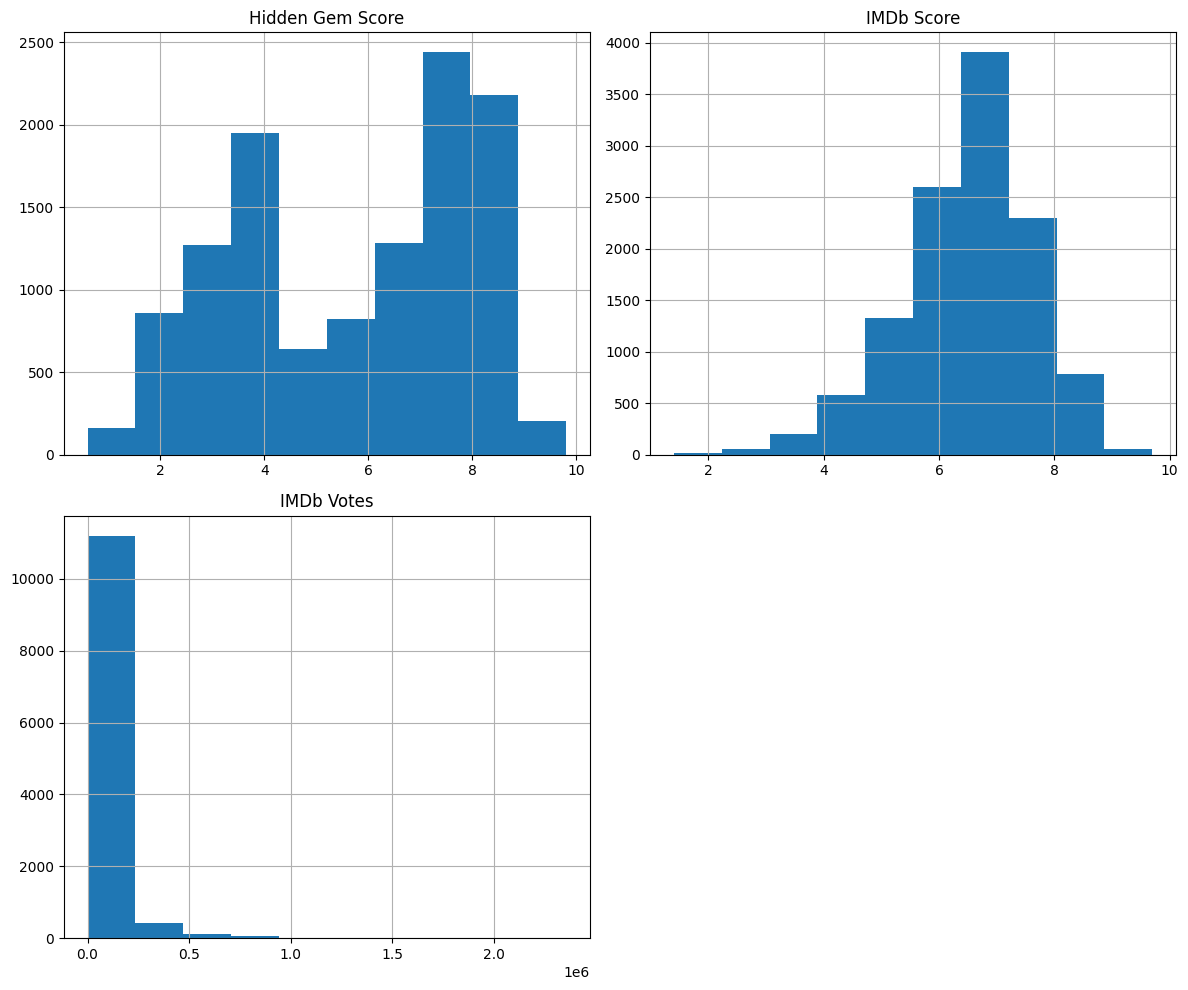

In [91]:
# Histograms
streaming_data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

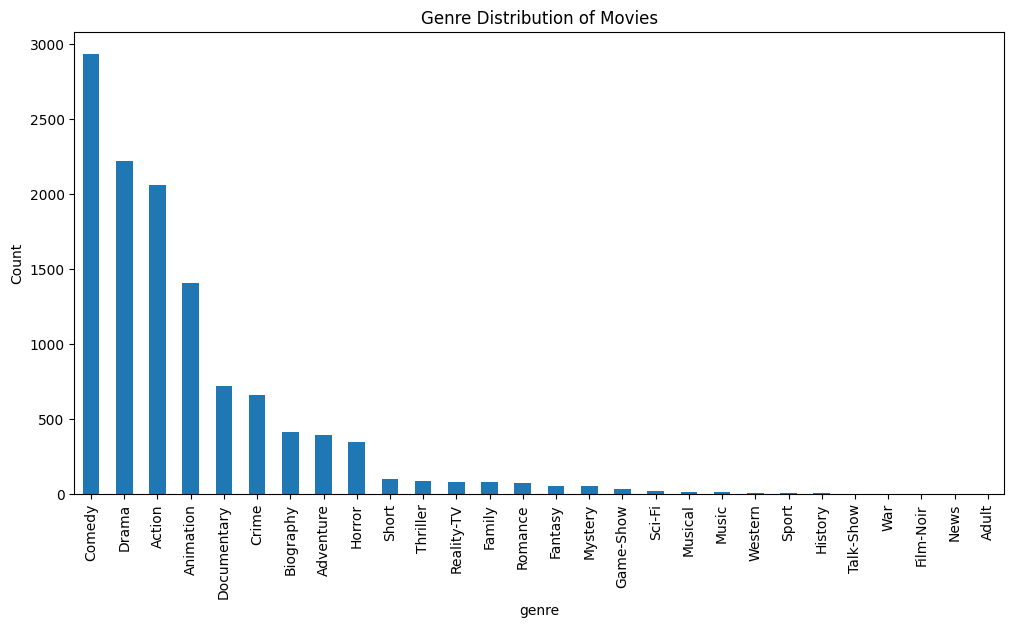

In [92]:
# Distribution of Genre
genre_count=streaming_data['Genre'].value_counts()
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Genre Distribution of Movies')
plt.xlabel('genre')
plt.ylabel('Count')
plt.show()


##### The above bar chart shows us the genres which are more prevalent in the dataset. From above we can see that the comedy genre is the leading genre and has a higher popularity. This is followed by drama and action and it can also be seen that talk-shows,Adult,Reality,western,sports,etc have lesser popularity.

In [93]:
import plotly.graph_objects as go

# Analyze comparison between Movie and Series in the Dataset
count = streaming_data['Series or Movie'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=streaming_data["Series or Movie"],
    y=count,
    text=count,
    textposition='auto',

)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title_text='Comparison between Movie and Series in the dataset',
    uniformtext_minsize=8, uniformtext_mode='hide',
    barmode='group', xaxis_tickangle=-45,
    yaxis=dict(title='Quantity', titlefont_size=14),
    xaxis=dict(title='Category', titlefont_size=14)
)

# Show the plot
fig.show()

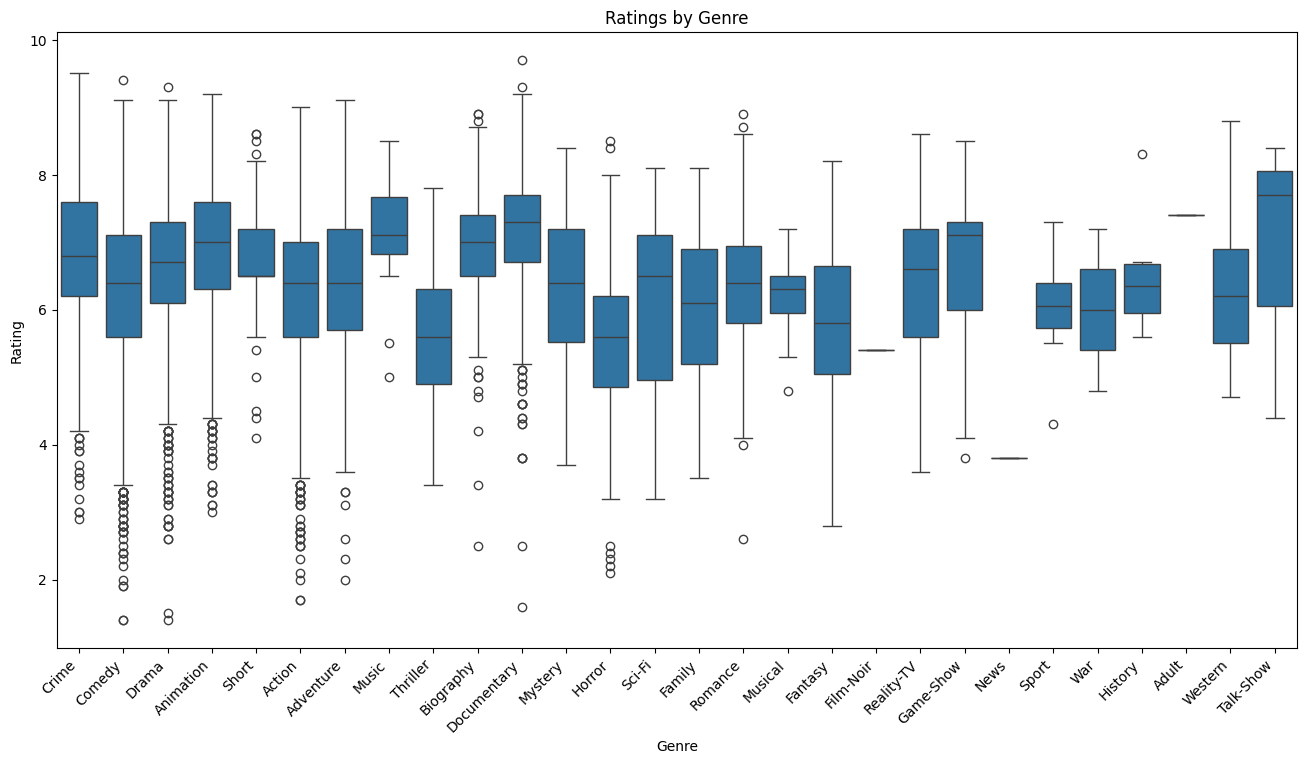

In [94]:
# Create boxplot to analyze our genres
plt.figure(figsize=(16,8))
sns.boxplot(x='Genre', y='IMDb Score',data=streaming_data)
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45,ha='right')
plt.show()

In [95]:
streaming_data.dtypes

,0
Title,object
Genre,object
Tags,object
Languages,object
Series or Movie,object
Country Availability,object
Runtime,object
Writer,object
Actors,object
Release Date,object


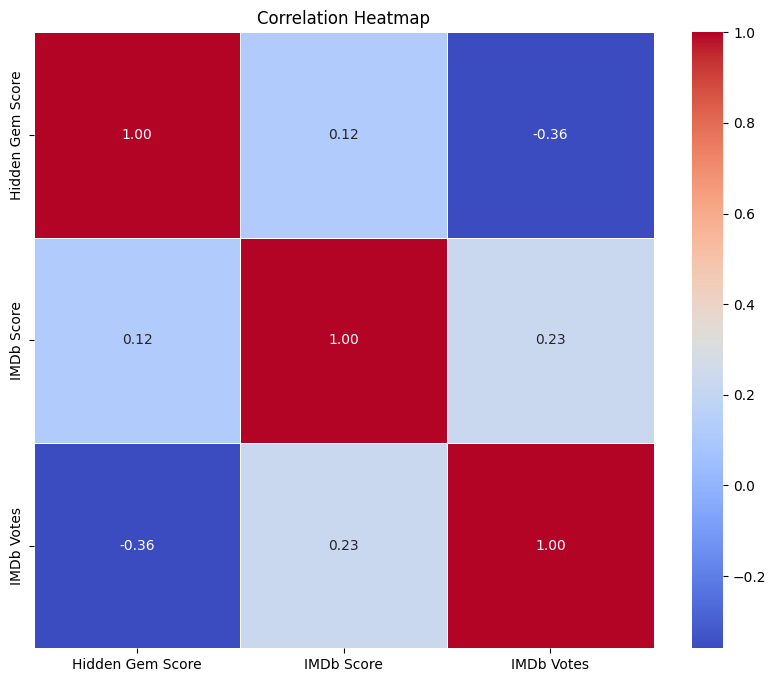

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
correlation_mat = numeric_streaming.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### The above correlation map is what we are using to understand the relationship between the different variables in the dataset, streaming_movies. The diagonal line, red indicates a perfect correlation between the variable and itself.


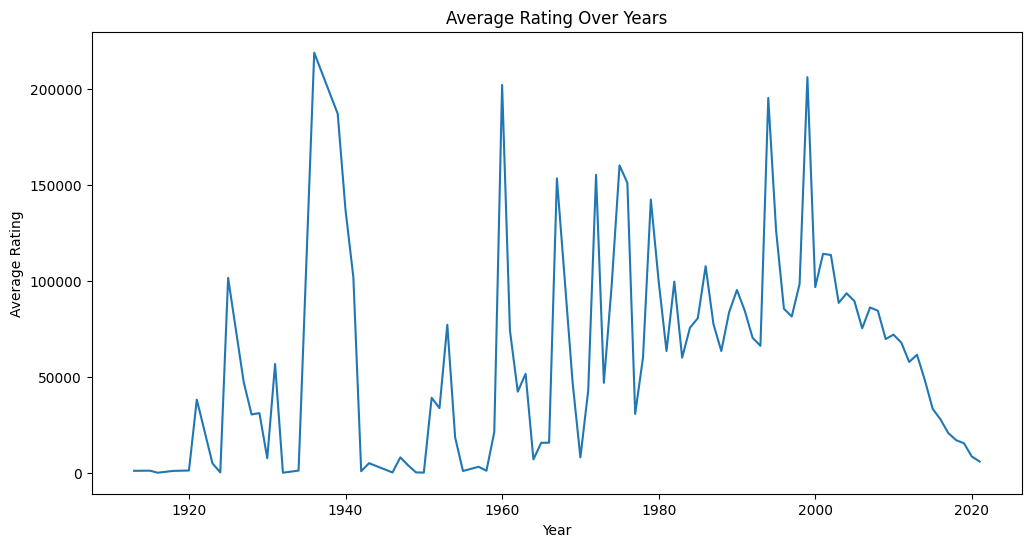

In [97]:
# Analyse Movie rating over the years using graph
plt.figure(figsize=(12, 6))
streaming_data['Release Date'] = pd.to_datetime(streaming_data['Release Date'])
streaming_data.groupby(streaming_data['Release Date'].dt.year)['IMDb Votes'].mean().plot()
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


#### The above graph shows that the average IMDB ratings has changed a lot over the years. The 1920s to the 1940s have many ups and downs with a big peak in 1940's, followed by a drop. From the 1960s to the 2000s, there are more high points, especially in the late 1960s and 1980s. However, from 2000 to 2020, the average votes decrease, showing less audience engagement in recent years.


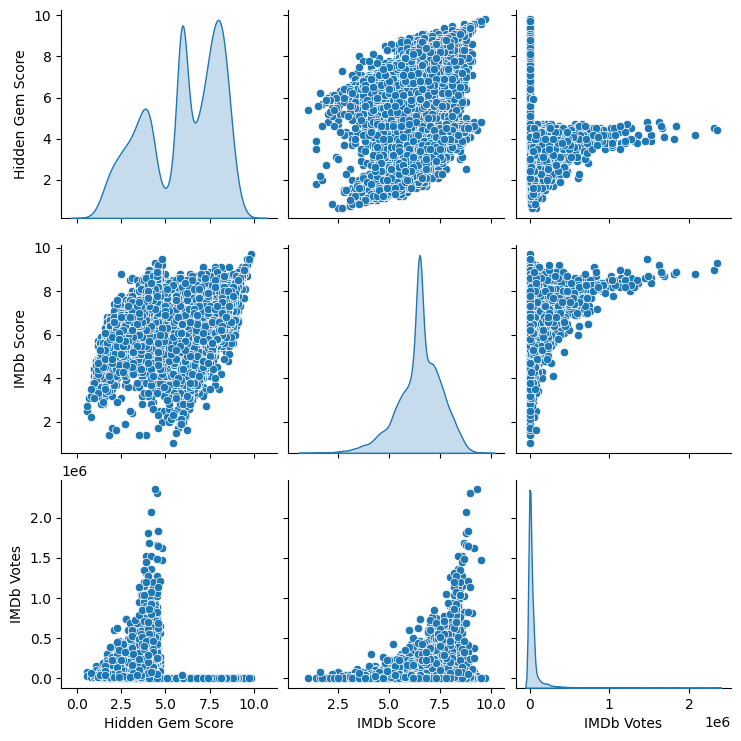

In [98]:
# Pairplot for numerical features
sns.pairplot(numeric_streaming, diag_kind='kde')
plt.show()

#### The pairpplot shows that the movies labeled as 'hidden gems' tend to have higher IMDb scores, suggesting that they are well-regarded despite being less known. However, the number of IMDb votes does not affect this rating or the hidden gem status. The right-skewed distributions show that while most movies receive average ratings and votes, a few stand out with high ratings or vote counts.

In [99]:
pip install wordcloud

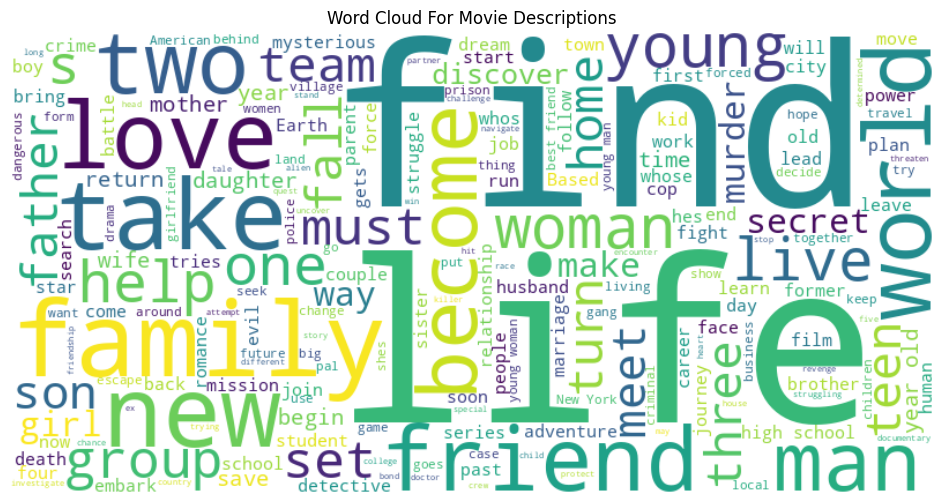

In [100]:
#One important aspect of the movie recommender system is the description feature. Using a word cloud helps us provide a visual representation of most occurring words which can help identify common themes in movies.
#since we will be using a content-based recommender , it will be beneficial to have a look at the most appeared words in our descriptions

from wordcloud import WordCloud

wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(streaming_data['Summary'].dropna()))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For Movie Descriptions')
plt.show()

#### In word clouds the size of each word indicates the frequency. Here we can see that most visible ones are the ones with larger fonts which are find , life, family. This indicates that these are words with high frequency and the smaller words are less common in our movie descriptions.

# Feature Engineering

#### Building the Movie Recommender System

In [101]:
# Import the NLTK library
import nltk
nltk.download('stopwords') # download stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
from nltk.stem.porter import PorterStemmer

# Initialize Porter Stemmer to normalize words and reduce variations
ps = PorterStemmer()

In [103]:
# Apply steming on selected column and return the processed text as a single string
def xStem(text):
    stemmed_words = []
    for word in text.split():
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [104]:
# Stem the text in the 'Summary' column and update the Summary column with the stemmed text
streaming_data['Summary'] = streaming_data['Summary'].apply(xStem)

# # Display the first entry in the updated 'Summary' column
streaming_data['Summary'][0]

'a med student with a supernatur gift tri to cash in on hi abil by face off against ghosts, till a wander spirit bring romanc instead.'

# Vectorization

In [105]:
# Create a TfidfVectorizer with english words removed and we will fit and transform our movie descriptions into Tf-idf vectors
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorized_streamingdata = vectorizer.fit_transform(streaming_data['Summary'])

In [106]:
vectorizer

TfidfVectorizer(stop_words='english')

In [107]:
vectorized_streamingdata

<11820x18936 sparse matrix of type '<class 'numpy.float64'>'
	with 169032 stored elements in Compressed Sparse Row format>

In [108]:
# Convert movie summary into numerical vectors using TfidVectorizer
movie_summary_vectors = vectorizer.fit_transform(streaming_data['Summary']).toarray()
movie_summary_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculate Vectors Similarities & Distances

In [109]:
# Display the numerical vector representation of the first movie's tags
movie_summary_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
# Import cosine_similarity to Calulate Distance between the Vectors
from sklearn.metrics.pairwise import cosine_similarity

In [111]:
#the pourpose of the cosine similarity here is to calculate the similarity between the Tf-idf vectors in our vectorized movie dataset.
streaming_similarity = cosine_similarity(vectorized_streamingdata, vectorized_streamingdata)

# Shape
streaming_similarity.shape

(11820, 11820)

In [112]:
streaming_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.01339014],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01339014, 0.        ,
        1.        ]])

In [113]:
streaming_similarity[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [114]:
# Display the similarity scores of the first movie with all other movies
# Similarity with itself is at index 0

print("Shape of Similarity Scores for First Movie: ", streaming_similarity[0].shape)
print("\n", "-"*35, "\n Similarity Scores for the First Movie ","\n","-"*35, "\n", streaming_similarity[0])

Shape of Similarity Scores for First Movie:  (11820,)

 ----------------------------------- 
 Similarity Scores for the First Movie  
 ----------------------------------- 
 [1. 0. 0. ... 0. 0. 0.]


In [115]:
""" Convert similarity scores into a list of tuples created that help in sorting,
 and retrieve the top 5 most similar movies """

top_similar_movies = sorted(list(enumerate(streaming_similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

In [116]:
top_similar_movies

[(8091, 0.2309057620257974),
 (6089, 0.19554379609490946),
 (7512, 0.19543435838231726),
 (4356, 0.18607616310393188),
 (4942, 0.15460289782360598)]

# Recommendations

#### Our resulting streaming_similarity will be used in our content-based recommendation system. This similarity matrix will be used to identify and recommend movies that are similar to a given movie.

In [117]:
#We will create a variable streaming_indices which will store a panda series that will map movie titles to their indices later on in our code.
streaming_indices = pd.Series(streaming_data.index, index = streaming_data['Title'])

# Training and Evaluating the Model

In [118]:
# Function that takes a movie title and returns the index of the specified movie.
def get_movie_title_index(movie, indices):
  index = indices[movie]
  if isinstance(index, np.int64):
    return index
  else:
    t = 0
    print('Select title: ')
    for i in range(len(index)):
      print(f'({i} - {streaming_data["Title"].iloc[index[i]]})', end=' ')
    rt = int(input())
    return index[t]

In [119]:
# Calls the function
get_movie_title_index('The Avengers', streaming_indices)

8973

In [120]:
# Function that recommends similar movies to the users based on the titles inputed
def recommend_movie_titles(movie_title, indices, cosine_similarity):
    print(f"\nMovie selected: {movie_title}")
    title_index = get_movie_title_index(movie_title, indices)
    if title_index is None:
        return

    print(f"\nRecommended Movies for ({movie_title}):")

    index = indices[movie_title]
    similarity = sorted(list(enumerate(cosine_similarity[index])), key=lambda x: x[1], reverse=True)
    similarity_list = similarity[1:6]  # Exclude the input movie itself

    for i in similarity_list:
        recommended_title = streaming_data['Title'].iloc[i[0]]
        recommended_year = streaming_data['Release Date'].iloc[i[0]]
        recommended_genre = streaming_data['Genre'].iloc[i[0]]
        print(f"Title: {recommended_title} | Date: {recommended_year} | Genre: {recommended_genre}")

# Model Evaluation and Optimization

### As this is a content-based recommender system, we have primarily used cosine similarity for evaluating the model. However, we tested with different movie titles to check the effectiveness of recommendations.

In [121]:
# calls the function
recommend_movie_titles('The Butterflys Dream', streaming_indices, cosine_similarity = streaming_similarity)
recommend_movie_titles('The Avengers', streaming_indices, cosine_similarity=streaming_similarity)
recommend_movie_titles('I Am Mother', streaming_indices, cosine_similarity=streaming_similarity)


Movie selected: The Butterflys Dream

Recommended Movies for (The Butterflys Dream):
Title: A Man Apart | Date: 2003-04-04 00:00:00 | Genre: Action
Title: Miss Bala | Date: 2019-02-01 00:00:00 | Genre: Action
Title: 2 Guns | Date: 2013-08-02 00:00:00 | Genre: Action
Title: Live Flesh | Date: 1998-01-16 00:00:00 | Genre: Drama
Title: Sabotage | Date: 2014-03-28 00:00:00 | Genre: Action

Movie selected: The Avengers

Recommended Movies for (The Avengers):
Title: Hedgehogs | Date: 2017-12-15 00:00:00 | Genre: Animation
Title: Max Manus: Man of War | Date: 2010-09-03 00:00:00 | Genre: Action
Title: Mike Tyson Mysteries | Date: 2017-09-01 00:00:00 | Genre: Animation
Title: On Wings of Eagles | Date: 2017-11-03 00:00:00 | Genre: Drama
Title: The Butterflys Dream | Date: 2013-02-22 00:00:00 | Genre: Biography

Movie selected: I Am Mother

Recommended Movies for (I Am Mother):
Title: Munafik 2 | Date: 2018-08-29 00:00:00 | Genre: Horror
Title: Jacobs Ladder | Date: 2019-08-23 00:00:00 | Genre

# Recommend Movie Names with Poster

In [122]:
import pandas as pd
from IPython.display import display, HTML

# Function to fetch the poster URL for a recommended movie from the local dataset
def get_poster_url(poster_path):
    # Assuming 'poster_path' is a URL or relative path stored in the dataset
    if poster_path:
        return poster_path
    else:
        return "https://via.placeholder.com/575x300?text=No+Poster+Available"

In [123]:
# Function to recommend movies and fetch their posters based on a given movie
def recommend_movies_and_posters(input_movie_title):
    try:
        # Find the index of the input movie
        movie_index = streaming_data[streaming_data["Title"].str.lower() == input_movie_title.lower()].index[0]
        similarity_scores = streaming_similarity[movie_index]
        list_of_movies = sorted(list(enumerate(similarity_scores)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_movies = []
        poster_urls = []
        for index in list_of_movies:
            movie = streaming_data.iloc[index[0]]
            recommended_movies.append(movie["Title"])
            # Fetch the poster URL from the 'Poster' column
            poster_urls.append(get_poster_url(movie["Poster"]))

        return recommended_movies, poster_urls
    except Exception as e:
        print(f"Error in recommending movies: {e}")
        return [], []

In [124]:
# Function to display recommended movie names and their posters
def display_movie_recommendations(selected_movie, movie_titles, poster_urls):
    display(HTML(f"""
    <div style="font-size:24px; font-weight:Bold; color:#fff; text-align:center; padding-top:8px; height:12%; width: 100%; border:1px solid #ccc; border-radius:10px; margin-top:10px; background-color:green;">
        Recommendations for: {selected_movie}
    </div>
    <table>
        <tr>
            {"".join([f'<td><img src="{url}" style="border-radius:10px; width:575px; height:300px;"></td>' for url in poster_urls])}
        </tr>
        <tr>
            {"".join([f'<td><p style="text-align:center; font-size:14px; font-weight:bold">{title}</p></td>' for title in movie_titles])}
        </tr>
    </table>"""))

# Test our Recommendation system with 4 movies from our dataset
movies_to_recommend = ["The Avengers", "Hedgehogs", "2067","Lets Fight Ghost"]
for movie in movies_to_recommend:
    recommended_titles, poster_urls = recommend_movies_and_posters(movie)
    display_movie_recommendations(movie, recommended_titles, poster_urls)

,,,,,
Hedgehogs,Max Manus: Man of War,Mike Tyson Mysteries,On Wings of Eagles,The Butterflys Dream,Fury


,,,,,
2067,Fate/Grand Order Absolute Demonic Front: Babylonia,No Game No Life: Zero,I Am Mother,Space Battleship Yamato 2199,Arif V 216


,,,,,
Assignment,Helter Skelter,Laerte-se,Engineering Girls,Spark,Spymate


,,,,,
Ghost Town,Superstition,Nisemonogatari,Down a Dark Hall,Every Day,Arctic Heart


5. Saving the Recommendation Model for Deployment

In [125]:
import joblib

# Save the model Components using Joblib
model_components={
    'tfidf_vectorizer':vectorizer,
    'cosine_similarity_matrix': streaming_similarity,
    'indices_mapping':streaming_indices
}

# Save the model using Joblib
joblib.dump(model_components, 'content_based_recommender.pkl')
joblib.dump(streaming_data, 'streaming_data.pkl')

['streaming_data.pkl']

# Load the Model

In [127]:
# Load the model components
loaded_components = joblib.load('content_based_recommender.pkl')
loaded_vectorizer = loaded_components['tfidf_vectorizer']
loaded_cosine_sim = loaded_components['cosine_similarity_matrix']
loaded_indices = loaded_components['indices_mapping']

# Load the streaming data
loaded_streaming_data = joblib.load('streaming_data.pkl')

# Load the model components
loaded_components = joblib.load('content_based_recommender.pkl')
loaded_vectorizer = loaded_components['tfidf_vectorizer']
loaded_cosine_sim = loaded_components['cosine_similarity_matrix']
loaded_indices = loaded_components['indices_mapping']

# Load the streaming data
loaded_streaming_data = joblib.load('streaming_data.pkl')


